# Introduction

Ce notebook présente les travaux mnés dans le cadre du cours de finance durable au sein du Mastère en Optimisation des Systèmes Energétiques.
L'objectif de ce projet est d'étudier plusieurs stratégies d'optimisation d'un portefeuille d'actifs issus du S&P500.
En plus d'implémenter des différents modèles d'optimisation, l'objectif de ce projet sera également de calculer différents indicateurs utilisés dans le secteur d'asset management.
Au-delà de mettre en place des stratégies d'optimisation et d'anlayser leurs différentes metrics, le but de ce travail est également d'intégrer des contraintes/ des pénalités d'empreinte carbone associé à chacun de nos actifs pour analyser l'impact qu'elles ont sur le rendement, le risque ainsi que d'autres métrics permettant d'anlayser la performance des portefeuilles. 

Ce notebook est divisé en 6 parties si nous excluons l'introduction ci-dessus. 
La première traite de la sélection des actifs qui seront intégrés dans les différents portefeuilles étudiés
La seconde partie de se notebook présente les différents modèles d'optimisation et les choix d'implémentation retenus pour le projet. 
Dans la troisième partie une analyse des indicateurs permettant de quantifier la performance des portefeuilles sera mené. 
Dans un quatrième temps nous relancerons de nouvelles optimisation mais cette fois-ci en intégrant des pénalités d'empreintes carbone.
Nous conduirons dans la cinquième partie une nouvelle analyse comparable à celle conduite dans la partie 3 pour comprendre l'impact des pénalités carbone sur les performances du portefeuilles.
Nous finirons ensuite par conclure notre étude en menant une réflexion sur l'ensemble du travail qui a été mené.



# Sélection des actifs

## Le jeu de données

Le jeu de données dont nous disposons contient les actifs S&P500

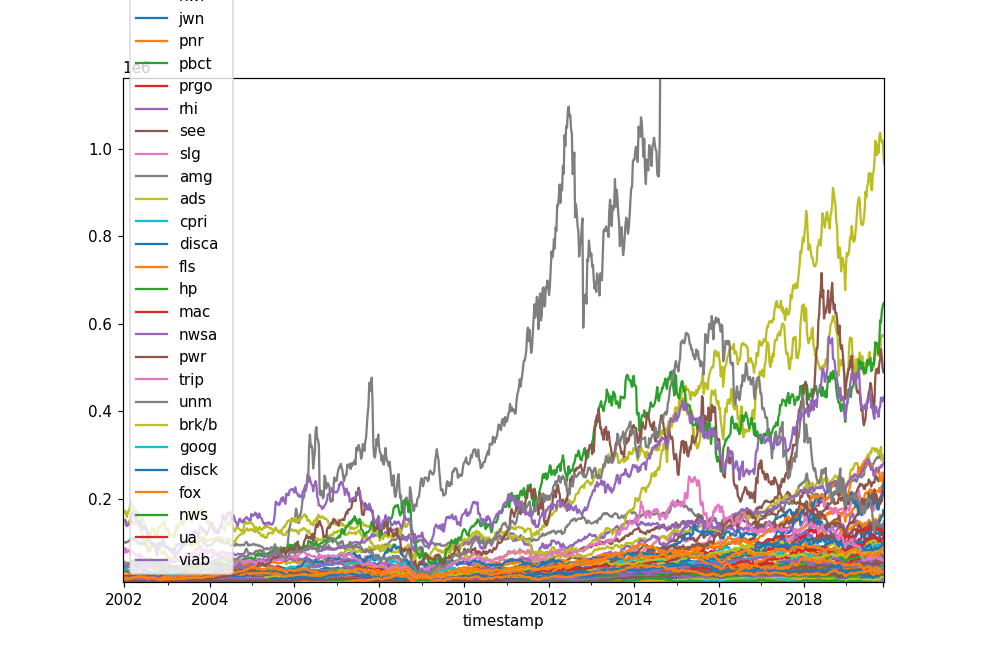

Dans la mesure où tous les actifs disponibles ne sont disponible depuis le début du dataset, nous avons procédé à un choix de début d'année d'analyse avant de conduite toute analyse et sélection. 

# Présentation des modèles d'optimisation

# Etude des résultats

# Intégration des contraintes d'empreintes carbones

# Etudes des résultats 

# Conclusion